In [1]:
from torchvision import datasets

data_path = "../dataset/chapter 7/"
cifar10 = datasets.CIFAR10(data_path, train=True, download=True)
cifar10_val = datasets.CIFAR10(data_path, train=False, download=True)

Files already downloaded and verified
Files already downloaded and verified


In [2]:
type(cifar10).__mro__

(torchvision.datasets.cifar.CIFAR10,
 torchvision.datasets.vision.VisionDataset,
 torch.utils.data.dataset.Dataset,
 typing.Generic,
 object)

In [3]:
cifar10, cifar10_val

(Dataset CIFAR10
     Number of datapoints: 50000
     Root location: ../dataset/chapter 7/
     Split: Train,
 Dataset CIFAR10
     Number of datapoints: 10000
     Root location: ../dataset/chapter 7/
     Split: Test)

In [4]:
len(cifar10)

50000

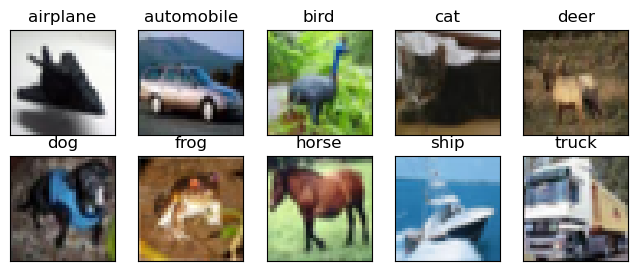

In [5]:
from matplotlib import pyplot as plt
import numpy as np

class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
num_classes = 10
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    ax.set_title(class_names[i])
    img = next(img for img, label in cifar10 if label == i)
    plt.imshow(img)
plt.show()

In [6]:
img, label = cifar10[99]
img, label, class_names[label]

(<PIL.Image.Image image mode=RGB size=32x32>, 1, 'automobile')

<function matplotlib.pyplot.show(close=None, block=None)>

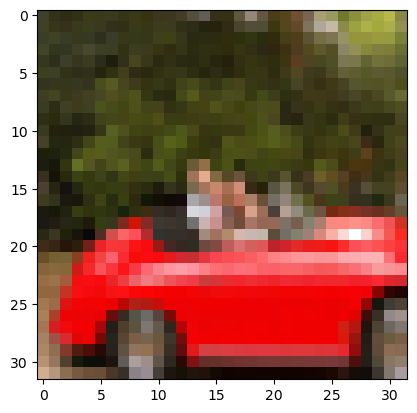

In [7]:
plt.imshow(img)
plt.show

In [8]:
from torchvision import transforms

In [9]:
dir(transforms)

['AugMix',
 'AutoAugment',
 'AutoAugmentPolicy',
 'CenterCrop',
 'ColorJitter',
 'Compose',
 'ConvertImageDtype',
 'ElasticTransform',
 'FiveCrop',
 'GaussianBlur',
 'Grayscale',
 'InterpolationMode',
 'Lambda',
 'LinearTransformation',
 'Normalize',
 'PILToTensor',
 'Pad',
 'RandAugment',
 'RandomAdjustSharpness',
 'RandomAffine',
 'RandomApply',
 'RandomAutocontrast',
 'RandomChoice',
 'RandomCrop',
 'RandomEqualize',
 'RandomErasing',
 'RandomGrayscale',
 'RandomHorizontalFlip',
 'RandomInvert',
 'RandomOrder',
 'RandomPerspective',
 'RandomPosterize',
 'RandomResizedCrop',
 'RandomRotation',
 'RandomSolarize',
 'RandomVerticalFlip',
 'Resize',
 'TenCrop',
 'ToPILImage',
 'ToTensor',
 'TrivialAugmentWide',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_pil_constants',
 '_presets',
 'autoaugment',
 'functional',
 'functional_pil',
 'functional_tensor',
 'transforms']

In [10]:
to_tensor = transforms.ToTensor()
img_t = to_tensor(img)
img_t.shape

torch.Size([3, 32, 32])

In [11]:
tensor_cifar10 = datasets.CIFAR10(data_path, train=True, download=False, transform=transforms.ToTensor())

In [12]:
img_t, _ = tensor_cifar10[99]

In [13]:
type(img_t)

torch.Tensor

In [14]:
img_t.shape, img_t.dtype

(torch.Size([3, 32, 32]), torch.float32)

In [15]:
img_t.min(), img_t.max()

(tensor(0.), tensor(1.))

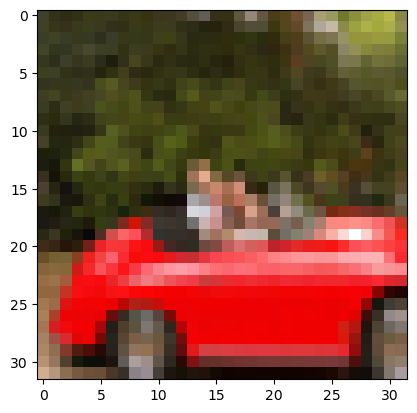

In [16]:
plt.imshow(img_t.permute(1, 2, 0))
plt.show()

In [17]:
import torch
imgs = torch.stack([img_t for img_t, _ in tensor_cifar10], dim=3)
imgs.shape

torch.Size([3, 32, 32, 50000])

In [18]:
imgs.view(3, -1).mean(dim=1)

tensor([0.4914, 0.4822, 0.4465])

In [19]:
imgs.view(3, -1).std(dim=1)

tensor([0.2470, 0.2435, 0.2616])

In [20]:
transforms.Normalize((0.4914, 0.4822, 0.4465),(0.2470, 0.2435, 0.2616))

Normalize(mean=(0.4914, 0.4822, 0.4465), std=(0.247, 0.2435, 0.2616))

In [21]:
transformed_cifar10 = datasets.CIFAR10(data_path, train=True, download=False, transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4915, 0.4823, 0.4468),
                             (0.2470, 0.2435, 0.2616))
    ]))

In [22]:
img_t, _ = transformed_cifar10[99]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


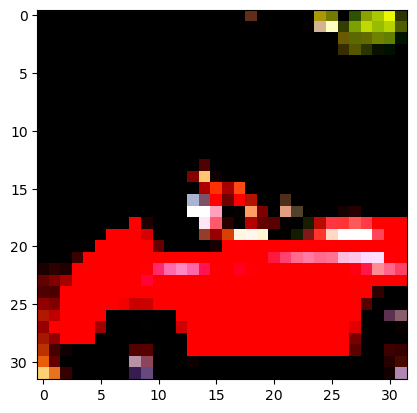

In [23]:
plt.imshow(img_t.permute(1, 2, 0))
plt.show()

In [24]:
label_map = {0: 0, 2: 1}
class_names = ['airplane', 'bird']

In [25]:
cifar2 = [(img, label_map[label]) for img, label in cifar10 if label in [0, 2]]
cifar2_val = [(img, label_map[label]) for img, label in cifar10_val if label in [0, 2]]

In [26]:
cifar2, cifar2_val

([(<PIL.Image.Image image mode=RGB size=32x32>, 1),
  (<PIL.Image.Image image mode=RGB size=32x32>, 1),
  (<PIL.Image.Image image mode=RGB size=32x32>, 1),
  (<PIL.Image.Image image mode=RGB size=32x32>, 1),
  (<PIL.Image.Image image mode=RGB size=32x32>, 0),
  (<PIL.Image.Image image mode=RGB size=32x32>, 0),
  (<PIL.Image.Image image mode=RGB size=32x32>, 0),
  (<PIL.Image.Image image mode=RGB size=32x32>, 1),
  (<PIL.Image.Image image mode=RGB size=32x32>, 1),
  (<PIL.Image.Image image mode=RGB size=32x32>, 1),
  (<PIL.Image.Image image mode=RGB size=32x32>, 1),
  (<PIL.Image.Image image mode=RGB size=32x32>, 0),
  (<PIL.Image.Image image mode=RGB size=32x32>, 1),
  (<PIL.Image.Image image mode=RGB size=32x32>, 1),
  (<PIL.Image.Image image mode=RGB size=32x32>, 1),
  (<PIL.Image.Image image mode=RGB size=32x32>, 1),
  (<PIL.Image.Image image mode=RGB size=32x32>, 0),
  (<PIL.Image.Image image mode=RGB size=32x32>, 1),
  (<PIL.Image.Image image mode=RGB size=32x32>, 0),
  (<PIL.Imag

In [27]:
import torch.nn as nn

n_out = 2
model = nn.Sequential(
    nn.Linear(3072, 512),
    nn.Tanh(),
    nn.Linear(512, n_out)
)

In [28]:
def softmax(x):
    return torch.exp(x) / torch.exp(x).sum()

In [29]:
x = torch.tensor([1.0, 2.0, 3.0])
softmax(x)

tensor([0.0900, 0.2447, 0.6652])

In [30]:
softmax(x).sum()

tensor(1.)

In [31]:
softmax = nn.Softmax(dim=1)

In [32]:
x = torch.tensor([[1.0, 2.0, 3.0], [1.0, 2.0, 3.0]])
softmax(x)

tensor([[0.0900, 0.2447, 0.6652],
        [0.0900, 0.2447, 0.6652]])

In [44]:
data_path = '../dataset/chapter 7/'
cifar10 = datasets.CIFAR10(
    data_path, train=True, download=False,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4915, 0.4823, 0.4468),
                             (0.2470, 0.2435, 0.2616))
    ]))

In [45]:
cifar10_val = datasets.CIFAR10(
    data_path, train=False, download=False,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4915, 0.4823, 0.4468),
                             (0.2470, 0.2435, 0.2616))
    ]))

In [46]:
label_map = {0: 0, 2: 1}
class_names = ['airplane', 'bird']
cifar2 = [(img, label_map[label])
          for img, label in cifar10 
          if label in [0, 2]]
cifar2_val = [(img, label_map[label])
              for img, label in cifar10_val
              if label in [0, 2]]

In [47]:
img, _ = cifar2[0]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


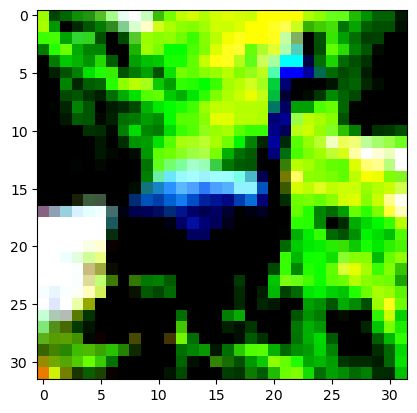

In [48]:
plt.imshow(img.permute(1, 2, 0))
plt.show()

In [49]:
img_batch = img.view(-1).unsqueeze(0)
img_batch

tensor([[ 0.6139, -0.3228, -0.1164,  ..., -1.2732, -1.3182, -1.0484]])

In [50]:
out = model(img_batch)

In [51]:
out

tensor([[-0.0595, -0.1297]], grad_fn=<AddmmBackward0>)

In [52]:
_, index = torch.max(out, dim=1)

In [53]:
index

tensor([0])

In [54]:
n_out = 2
model = nn.Sequential(
    nn.Linear(3072, 512),
    nn.Tanh(),
    nn.Linear(512, n_out),
    nn.LogSoftmax(dim=1)
)

In [55]:
learning_rate = 1e-2

In [58]:
import torch.optim as optim

optimizer = optim.SGD(model.parameters(), lr = learning_rate)
loss_fn = nn.NLLLoss()
n_epochs = 100

for epochs in range(n_epochs):
    for img, label in cifar2:
        out  = model(img.view(-1).unsqueeze(0))
        loss = loss_fn(out, torch.tensor([label]))
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

NameError: name 'epoch' is not defined

In [59]:
train_loard = torch.utils.data.DataLoader(cifar2, batch_size=64, shuffle=True)

In [61]:
list(train_loard), train_loard

([[tensor([[[[ 7.4105e-02, -5.2790e-03,  4.2352e-02,  ...,  5.1866e-01,
               5.0278e-01,  4.7102e-01],
             [ 7.4105e-02,  5.8228e-02,  1.2174e-01,  ...,  4.5515e-01,
               4.3927e-01,  4.0752e-01],
             [ 2.0112e-01,  2.0112e-01,  2.3287e-01,  ...,  4.3927e-01,
               4.7102e-01,  4.0752e-01],
             ...,
             [ 5.3453e-01, -1.6405e-01, -5.1334e-01,  ...,  3.5989e-01,
               4.2339e-01,  2.3287e-01],
             [ 8.9982e-02, -5.9272e-01, -9.8964e-01,  ...,  6.1392e-01,
               6.9330e-01,  4.2352e-02],
             [-3.8632e-01, -8.4675e-01, -1.1643e+00,  ...,  7.2505e-01,
               3.7576e-01, -3.7045e-01]],
   
            [[ 1.4516e-01,  6.4637e-02,  9.6848e-02,  ...,  3.0621e-01,
               2.9011e-01,  2.9011e-01],
             [ 8.0743e-02,  8.0743e-02,  1.1295e-01,  ...,  2.7400e-01,
               2.4179e-01,  2.4179e-01],
             [ 1.4516e-01,  1.6127e-01,  1.7737e-01,  ...,  2.7400e-01,
 

In [63]:
import torch
import torch.nn as nn
import torch.optim as optim

train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64,
                                           shuffle=True)

model = nn.Sequential(
            nn.Linear(3072, 128),
            nn.Tanh(),
            nn.Linear(128, 2),
            nn.LogSoftmax(dim=1))

learning_rate = 1e-2

optimizer = optim.SGD(model.parameters(), lr=learning_rate)

loss_fn = nn.NLLLoss()

n_epochs = 100

for epoch in range(n_epochs):
    for imgs, labels in train_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        loss = loss_fn(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

Epoch: 0, Loss: 0.558494
Epoch: 1, Loss: 0.617352
Epoch: 2, Loss: 0.569927
Epoch: 3, Loss: 0.567687
Epoch: 4, Loss: 0.561128
Epoch: 5, Loss: 0.142474
Epoch: 6, Loss: 0.338881
Epoch: 7, Loss: 0.421149
Epoch: 8, Loss: 0.388780
Epoch: 9, Loss: 0.557880
Epoch: 10, Loss: 0.393403
Epoch: 11, Loss: 0.280463
Epoch: 12, Loss: 0.595925
Epoch: 13, Loss: 0.313911
Epoch: 14, Loss: 0.383387
Epoch: 15, Loss: 0.273300
Epoch: 16, Loss: 0.400318
Epoch: 17, Loss: 0.393385
Epoch: 18, Loss: 0.157593
Epoch: 19, Loss: 0.295978
Epoch: 20, Loss: 0.265510
Epoch: 21, Loss: 0.136639
Epoch: 22, Loss: 0.291416
Epoch: 23, Loss: 0.248509
Epoch: 24, Loss: 0.377051
Epoch: 25, Loss: 0.299794
Epoch: 26, Loss: 0.294570
Epoch: 27, Loss: 0.244614
Epoch: 28, Loss: 0.226197
Epoch: 29, Loss: 0.181288
Epoch: 30, Loss: 0.179677
Epoch: 31, Loss: 0.238440
Epoch: 32, Loss: 0.140682
Epoch: 33, Loss: 0.301329
Epoch: 34, Loss: 0.119911
Epoch: 35, Loss: 0.104488
Epoch: 36, Loss: 0.138253
Epoch: 37, Loss: 0.203076
Epoch: 38, Loss: 0.313

In [68]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64,
                                           shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in train_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
        
print("Accuracy: %f" % (correct / total))

Accuracy: 0.999500


In [67]:
val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size=64, shuffle=False)
correct = 0
total = 0
with torch.no_grad():
    for imgs, labels in val_loader:
        batch_size = imgs.shape[0]
        outputs = model(imgs.view(batch_size, -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
print("Accuracy: %f" % (correct / total))

Accuracy: 0.809500


In [66]:
imgs.view(64, -1).shape

torch.Size([64, 768])

In [69]:
sum([p.numel() for p in model.parameters()])

393602

In [70]:
sum([p.numel() for p in model.parameters() if p.requires_grad == True])

393602

In [71]:
linear = nn.Linear(3072, 1024)

linear.weight.shape, linear.bias.shape

(torch.Size([1024, 3072]), torch.Size([1024]))